In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
from sklearn.datasets import load_iris
iris=load_iris()

In [4]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
# creating a data frame from this 

df= pd.DataFrame(iris.data, columns= iris.feature_names)

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
df["target"]= iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
#EDA
#check 1 kis kis me hai target me 
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [13]:
#check 2 kis kis me hai target me 
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [16]:
#add another feature name flower name which contains setosa , virginica etc

df["flower_name"]=df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [17]:
df0= df[df.target==0]
df1= df[df.target==1]
df2= df[df.target==2]

In [18]:
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [19]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


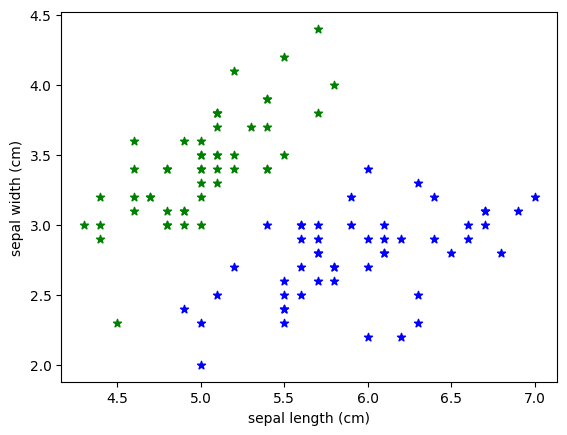

In [23]:
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")


plt.scatter(df0["sepal length (cm)"], df0["sepal width (cm)"], color="green", marker='*')
plt.scatter(df1["sepal length (cm)"], df1["sepal width (cm)"], color="blue", marker='*')

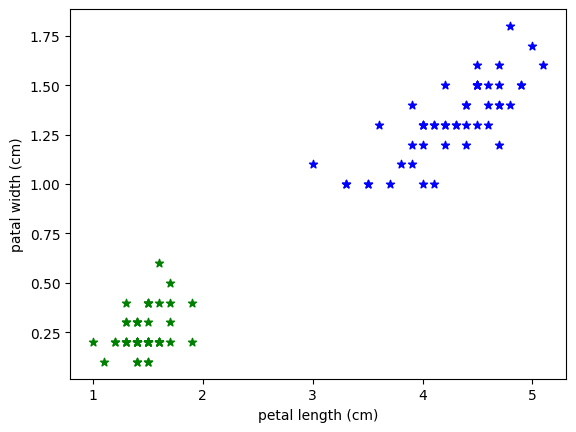

In [24]:
plt.xlabel("petal length (cm)")
plt.ylabel("patal width (cm)")


plt.scatter(df0["petal length (cm)"], df0["petal width (cm)"], color="green", marker='*')
plt.scatter(df1["petal length (cm)"], df1["petal width (cm)"], color="blue", marker='*')

In [25]:
x= df.drop(["target","flower_name"], axis=1)
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
y= df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test= train_test_split(x,y, test_size=0.2)

In [30]:
len(x_train)

120

In [31]:
len(x_test)

30

In [45]:
from sklearn.svm import SVC
#model= SVC(gamma=10)
model= SVC(kernel="linear", gamma= 20)

In [46]:
model.fit(x_train, y_train)

SVC(gamma=20, kernel='linear')

In [47]:
model.score(x_test, y_test)

1.0